(lecture14:linear-regression-with-one-variance)=
# Linear regression with one variable

Assume that you have $N$ pairs of observations $(x_i, y_i)$ from two random variables $X$ and $Y$.
Now, you suspect that there is a linear relationship between these two random variables.
Namely, you suspect that there exist coefficients $a$ and $b$ such that:

$$
Y = a X + b + U,
$$

where $U$ is some unobserved factor that we are going to treat as noise.
How can you find $a$ and $b$ from the $N$ observations we have?
This is a so-called *regression* problem.

Let's develop the simplest possible approach for solving the regression problem.
It is called the *least squares* approach.
The approach basically says that you should pick $a$ and $b$ so as to minimize the sum of square errors:

$$
L(a,b) = \sum_{i=1}^N(ax_i + b - y_i)^2.
$$

The error here is the prediction you are making for $y_i$ for given $a$ and $b$.

Okay, we proceed as usual.
We take derivatives of $L$ with respect to $a$ and $b$, set them equal to zero and solve for $a$ and $b$.
Let's do it:

$$
\begin{split}
\frac{\partial L(a,b)}{\partial a} &= \frac{\partial}{\partial a}\sum_{i=1}^N(ax_i + b - y_i)^2\\
&= \sum_{i=1}^N\frac{\partial}{\partial a}(ax_i + b - y_i)^2\\
&= \sum_{i=1}^N2(ax_i+b-y_i)x_i\\
&= 2\sum_{i=1}^N(ax_i^2 + bx_i - y_ix_i)\\
&= 2\left[a\sum_{i=1}^Nx_i^2 + b\sum_{i=1}^Nx_i - \sum_{i=1}^Nx_iy_i\right].
\end{split}
$$

Here is the other one:

$$
\begin{split}
\frac{\partial L(a,b)}{\partial b} &= \frac{\partial}{\partial b}\sum_{i=1}^N(ax_i + b - y_i)^2\\
&= \sum_{i=1}^N\frac{\partial}{\partial b}(ax_i + b - y_i)^2\\
&= \sum_{i=1}^N2(ax_i+b-y_i)\\
&= 2\sum_{i=1}^N(ax_i+b-y_i)\\
&= 2\left[a\sum_{i=1}^Nx_i + bN - \sum_{i=1}^Ny_i\right].
\end{split}
$$

Setting these two derivatives to zero, yields the following linear system:

$$
\begin{split}
a\sum_{i=1}^Nx_i^2 + b\sum_{i=1}^Nx_i &= \sum_{i=1}^Nx_iy_i,\\
a\sum_{i=1}^Nx_i + bN &= \sum_{i=1}^Ny_i.
\end{split}
$$

This is a 2x2 system and we can solve it by substitution.
Take the second equation and solve for $b$:

$$
\begin{split}
b &= \frac{1}{N}\left[\sum_{i=1}^Ny_i - a\sum_{i=1}^Nx_i\right]\\
&= \frac{1}{N}\sum_{i=1}^Ny_i - a \frac{1}{N}\sum_{i=1}^Nx_i\\
&= \hat{\mu}_Y - a \hat{\mu}_X,
\end{split}
$$

where $\hat{\mu}_X$ and $\hat{\mu}_Y$ are the empirical estimates of the mean of $X$ and $Y$, respectively.
Now let's take this and substitute in the first equation of the linear system.
We have:

$$
\begin{split}
&a\sum_{i=1}^Nx_i^2 + (\hat{\mu}_Y - a \hat{\mu}_X)\sum_{i=1}^Nx_i = \sum_{i=1}^Nx_iy_i\\
&\Rightarrow
a\left[\sum_{i=1}^Nx_i^2 - \hat{\mu}_X\sum_{i=1}^Nx_i\right] = \sum_{i=1}^Nx_iy_i - \hat{\mu}_Y\sum_{i=1}^Nx_i\\
&\Rightarrow
a\frac{1}{N}\left[\sum_{i=1}^Nx_i^2 - \hat{\mu}_X\sum_{i=1}^Nx_i\right] = \frac{1}{N}\sum_{i=1}^Nx_iy_i - \frac{1}{N}\hat{\mu}_Y\sum_{i=1}^Nx_i\\
&\Rightarrow
a\left[\frac{1}{N}\sum_{i=1}^Nx_i^2 - \hat{\mu}_X\frac{1}{N}\sum_{i=1}^Nx_i\right] = \frac{1}{N}\sum_{i=1}^Nx_iy_i - \hat{\mu}_Y\frac{1}{N}\sum_{i=1}^Nx_i\\
&\Rightarrow
a\left[\frac{1}{N}\sum_{i=1}^Nx_i^2 - \hat{\mu}_X\cdot \hat{\mu}_X\right] = \frac{1}{N}\sum_{i=1}^Nx_iy_i - \hat{\mu}_Y\cdot \hat{\mu}_X\\
&\Rightarrow
a\left[\frac{1}{N}\sum_{i=1}^Nx_i^2 - \hat{\mu}_X^2\right] = \frac{1}{N}\sum_{i=1}^Nx_iy_i - \hat{\mu}_Y\cdot \hat{\mu}_X
\end{split}
$$

Now the magic starts...
Notice that the coefficient of $a$ is actually the empirical estimate of the variance of $X$:

$$
\hat{\sigma}_X^2 = \frac{1}{N}\sum_{i=1}^N(x_i-\hat{\mu}_X)^2 = \dots = \frac{1}{N}\sum_{i=1}^Nx_i^2 - \hat{\mu}_X^2.
$$

Similarly, the right-hand-side is the empirical estimate of the covariance of $X$ and $Y$:

$$
\hat{\sigma}_{X,Y} = \frac{1}{N}\sum_{i=1}^N(x_i-\hat{\mu}_X)(y_i-\hat{\mu}_Y) = \dots = \frac{1}{N}\sum_{i=1}^Nx_iy_i - \hat{\mu}_X\cdot \hat{\mu}_Y.
$$

Putting everything together, gives us that:

$$
a\hat{\sigma}_X^2 = \hat{\sigma}_{X,Y}.
$$

Solving for $a$:

$$
a = \frac{\hat{\sigma}_{X,Y}}{\hat{\sigma}_X^2} = \frac{\hat{\sigma}_{X,Y}}{\hat{\sigma}_X\hat{\sigma}_Y}\frac{\hat{\sigma}_Y}{\hat{\sigma}_X},
$$

which gives a relationship between $a$ and the correlation coefficient between $X$ and $Y$:

$$
\hat{a} = \hat{\rho}_{X,Y}\frac{\hat{\sigma}_Y}{\hat{\sigma}_X}.
$$

This is very very interesting.
Intuitively, dividing by $\sigma_X$ removes the units of $X$, multiplying with $\sigma_Y$ puts units of $Y$ and then you multiply with the correlation coefficient to get the direction right!
Nice!

What about $b$?
Let's substitute back into the equation:

$$
\hat{b} = \hat{\mu}_Y - \hat{a} \hat{\mu}_X.
$$

So, this is the difference between the mean of the data and the mean prediction of our fitted model.

Let's end the theory by looking at the final square error.
We will just plug in $\hat{a}$ and $\hat{b}$ in $L$ and see what we get.
This is the result:

$$
L(\hat{a}, \hat{b}) = N(1- \hat{\rho}_{X,Y}^2)\hat{\sigma}_Y^2.
$$

What does this say?
The following:

- The error grows with the number of points. This makes sense. More points more error.
- If the correlation coefficient is zero, then the error is maximized and it is $N$ times the variance of $Y$.
- The error becomes zero if the correlation of coefficient is exactly one or minus one.

And this is the proof if you are interested:

$$
\begin{split}
L(\hat{a}, \hat{b}) &= \sum_{i=1}^N(\hat{a}x_i + \hat{b} - y_i)^2\\
&= \sum_{i=1}^N(\hat{a}x_i + \hat{\mu}_Y - \hat{a} \hat{\mu}_X - y_i)^2\\
&= \sum_{i=1}^N\left[\hat{a}(x_i-\hat{\mu}_X) - (y_i - \hat{\mu}_Y)\right]^2\\
&= \sum_{i=1}^N\left[\hat{a}^2(x_i-\hat{\mu}_X)^2 + (\hat{\mu}_Y - y_i)^2 - 2\hat{a}(x_i-\hat{\mu}_X)(\hat{\mu}_Y - y_i)\right]^2\\
&= \hat{a}^2\sum_{i=1}^N(x_i-\hat{\mu}_X)^2 + \sum_{i=1}^N(\hat{\mu}_Y - y_i)^2
- 2\hat{a}\sum_{i=1}^N(x_i-\hat{\mu}_X)(\hat{\mu}_Y - y_i)\\
&= \hat{a}^2N\hat{\sigma}^2_X + N\hat{\sigma}_Y^2 + 2\hat{a}N\hat{\sigma}_{X,Y}\\
&= N\left[\hat{\sigma}_Y^2 + \hat{\rho}_{X,Y}^2\frac{\hat{\sigma}_Y^2}{\hat{\sigma}_X^2}\hat{\sigma}^2_X 
-2\hat{\rho}_{X,Y}\frac{\hat{\sigma}_Y}{\hat{\sigma}_X}\hat{\sigma}_{X,Y}\right]\\
&= N\left[\hat{\sigma}_Y^2 + \hat{\rho}_{X,Y}^2\hat{\sigma}_Y^2
-2\hat{\rho}_{X,Y}^2\hat{\sigma}_Y^2\right]\\
&= N\left[\hat{\sigma}_Y^2 - \hat{\rho}_{X,Y}^2\hat{\sigma}_Y^2\right]\\
&= N(1- \hat{\rho}_{X,Y}^2)\hat{\sigma}_Y^2.
\end{split}
$$

## Example: Modeling `hvac` as a function of `t_out`

Let's now calculate the estimate we developed for the correlation coefficient in the smart buildings dataset.
In particular, we are going to estimate the correlation coefficient between $X=$`t_out` and $Y=$`hvac` for heating and cooling.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import numpy as np
import scipy.stats as st
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)
   
# The url of the file we want to download
url = 'https://github.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/raw/master/homework/temperature_raw.xlsx'
download(url)
import pandas as pd
df = pd.read_excel('temperature_raw.xlsx')
df = df.dropna(axis=0)
df.head()
df_heating = df[df['t_out'] < 60]
df_cooling = df[df['t_out'] > 70]
df_off = df[(df['t_out'] >= 60) & (df['t_out'] <= 70)]

First, we do the cooling:

In [4]:
xdata = df_cooling['t_out']
ydata = df_cooling['hvac']

# Estimate the statistics
mu_X = xdata.mean()
mu_Y = ydata.mean()
sigma_X = xdata.std()
sigma_Y = ydata.std()
rho_XY = np.corrcoef(xdata, ydata)[0, 1]

# The a coefficient
a = rho_XY * sigma_Y / sigma_X 
# The b coefficient
b = mu_Y - a * mu_X

# Print the results
print('Model coefficients for cooling: ')
print('a = {0:1.2f}'.format(a))
print('b = {0:1.2f}'.format(b))

Model coefficients for cooling: 
a = 3.78
b = -229.95


Here is how you can evaluate the model in arbitrary points:

In [7]:
xs = np.linspace(xdata.min(), xdata.max())
ys = a * xs + b

Let's visualize the model we just built:

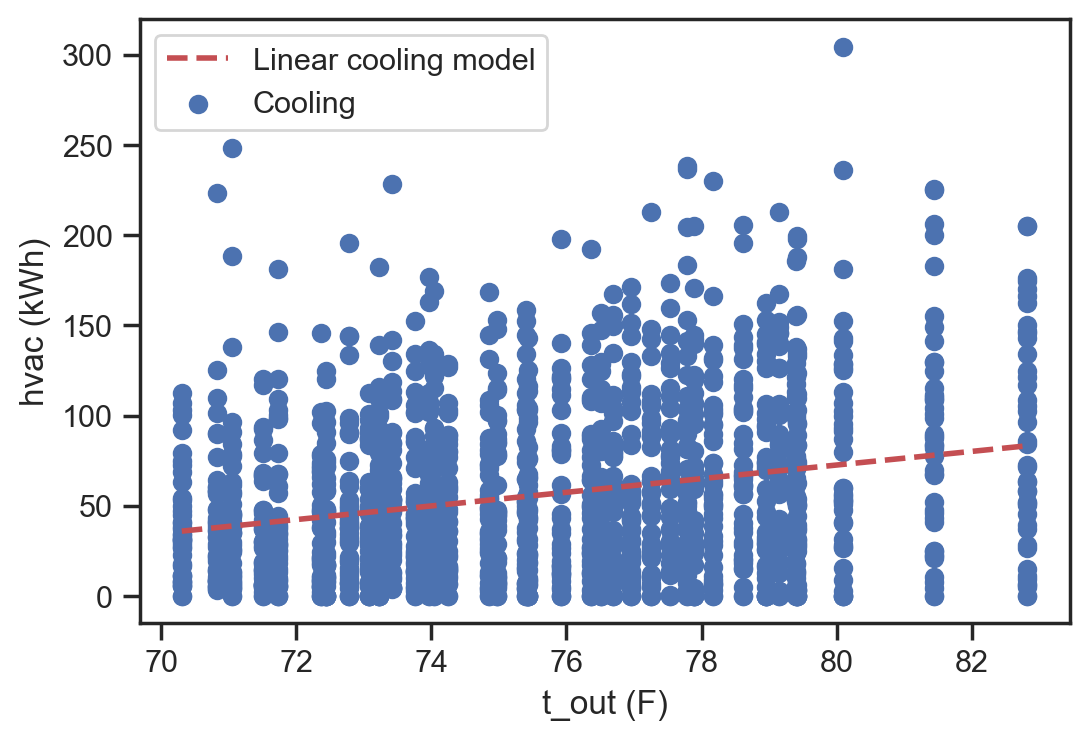

In [11]:
fig, ax = plt.subplots()
ax.scatter(df_cooling['t_out'], df_cooling['hvac'], label='Cooling')
ax.plot(xs, ys, 'r--', lw=2, label='Linear cooling model')
ax.set_xlabel('t_out (F)')
ax.set_ylabel('hvac (kWh)')
plt.legend(loc='best');

Now for heating:

Model coefficients for heating: 
a = -4.99
b = 296.26


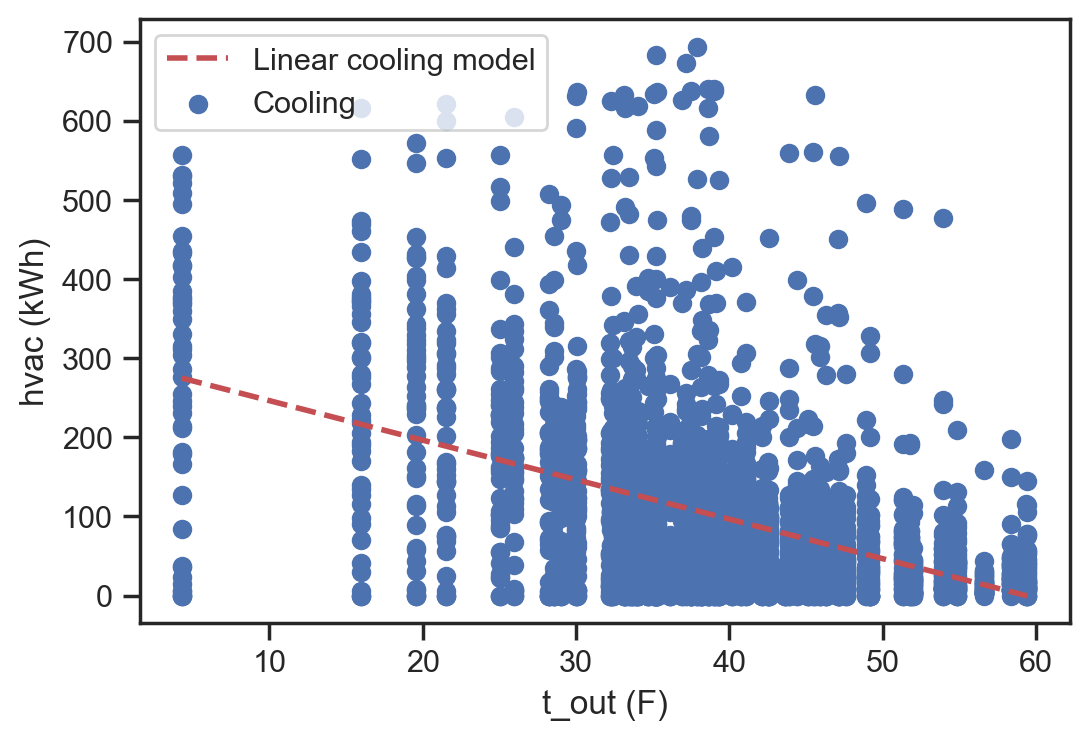

In [15]:
xdata = df_heating['t_out']
ydata = df_heating['hvac']

# Estimate the statistics
mu_X = xdata.mean()
mu_Y = ydata.mean()
sigma_X = xdata.std()
sigma_Y = ydata.std()
rho_XY = np.corrcoef(xdata, ydata)[0, 1]

# The a coefficient
a = rho_XY * sigma_Y / sigma_X 
# The b coefficient
b = mu_Y - a * mu_X

# Print the results
print('Model coefficients for heating: ')
print('a = {0:1.2f}'.format(a))
print('b = {0:1.2f}'.format(b))

# Visualize
xs = np.linspace(xdata.min(), xdata.max())
ys = a * xs + b
fig, ax = plt.subplots()
ax.scatter(df_heating['t_out'], df_heating['hvac'], label='Cooling')
ax.plot(xs, ys, 'r--', lw=2, label='Linear cooling model')
ax.set_xlabel('t_out (F)')
ax.set_ylabel('hvac (kWh)')
plt.legend(loc='best');